In [1]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import eulerN as arch 
import torch
from torch import nn
# warnings.filterwarnings('ignore')

In [2]:
Vo = torch.tensor(np.load('../data/L63-trajectories/test.npy'))
L0, L1 = 0.4, 3.5
beta = 7e-8
training_points = 25000
n_repeats = 500
tau_f_kwargs = {'error_threshold' : 0.05, 'dt': 0.02, 'Lyapunov_time': 1/0.91}

In [3]:
# Look for optimal beta
D_r, B, batch_size, normalize, save_best = 512, 10, 100, False, True
Uo = torch.tensor(np.load(f'../data/L63-trajectories/train{B}.npy'))
drf_args = [D_r, B, L0, L1, Uo, beta, 'EulerN', f"../data/EulerN/L63/depth-{B}/D_r-{D_r}{'' if not normalize else '-normalized'}", normalize]
batch = arch.BatchDeepRF(Uo, Vo, *drf_args)
# batch.search_beta(negative_log10_range = [6.5, 10.], resolution=20, n_repeats=10, training_points=20000, **tau_f_kwargs)

In [4]:
# data = batch.get_beta_data()
# beta = data['beta'][np.argmax(data['tau_f_nmse'].to_numpy())]
D_r, B, batch_size, normalize, save_best = 512, 10, 100, False, True
Uo = torch.tensor(np.load(f'../data/L63-trajectories/train{B}.npy'))
drf_args = [D_r, B, L0, L1, Uo, 1e-8, 'EulerN', f"../data/EulerN/L63/depth-{B}/D_r-{D_r}{'' if not normalize else '-normalized'}", normalize]
batch = arch.BatchDeepRF(Uo, Vo, *drf_args)
batch.run(training_points, n_repeats, batch_size, save_best, **tau_f_kwargs)

Running experiments for batch 0...
Time taken by learn is 0.5785 seconds
Time taken by learn is 0.5682 seconds
Time taken by learn is 0.5667 seconds
Time taken by learn is 0.5682 seconds
Time taken by learn is 0.5712 seconds
Time taken by learn is 0.5757 seconds
Time taken by learn is 0.5673 seconds
Time taken by learn is 0.5666 seconds
Time taken by learn is 0.5729 seconds
Time taken by learn is 0.5654 seconds
Time taken by learn is 0.5670 seconds
Time taken by learn is 0.5795 seconds
Time taken by learn is 0.5776 seconds
Time taken by learn is 0.5752 seconds
Time taken by learn is 0.5653 seconds
Time taken by learn is 0.5651 seconds
Time taken by learn is 0.5669 seconds
Time taken by learn is 0.5683 seconds
Time taken by learn is 0.5679 seconds
Time taken by learn is 0.5660 seconds
Time taken by learn is 0.5639 seconds
Time taken by learn is 0.5667 seconds
Time taken by learn is 0.5643 seconds
Time taken by learn is 0.5656 seconds
Time taken by learn is 0.5665 seconds
Time taken by l

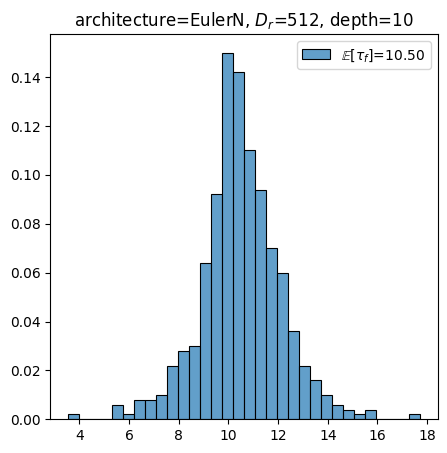

In [5]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
tau_f = batch.get_data()['tau_f_se']
sns.histplot(tau_f, ax=ax, label=r'$\mathbb{E}[\tau_f]$'+f'={tau_f.mean():.2f}', alpha=0.7, stat='probability')
ax.legend()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(fr'architecture=EulerN, $D_r$={D_r}, depth={batch.drf.net.B}')
plt.savefig(f'{batch.drf.save_folder}/tau_f.png', bbox_inches='tight', dpi=300)

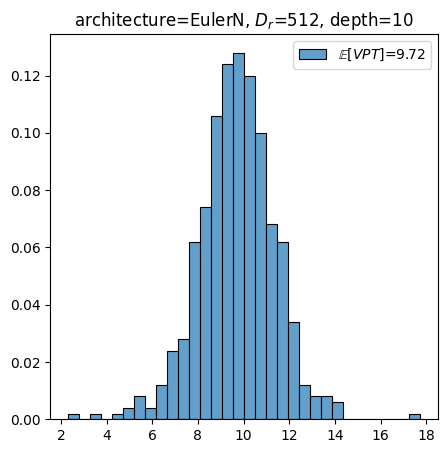

In [6]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
tau_f = batch.get_data()['tau_f_nmse']
sns.histplot(tau_f, ax=ax, label=r'$\mathbb{E}[VPT]$'+f'={tau_f.mean():.2f}', alpha=0.7, stat='probability')
ax.legend()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(fr'architecture=EulerN, $D_r$={D_r}, depth={batch.drf.net.B}')
plt.savefig(f'{batch.drf.save_folder}/tau_f_nmse.png', bbox_inches='tight', dpi=300)

In [4]:
drf = arch.DeepRF(*drf_args)
drf.sampler.sample(4096)
drf.sampler.sample_vec(4096)

Time taken by set_stats is 0.0050 seconds
Time taken by sample is 0.3067 seconds
Time taken by sample_vec is 0.0012 seconds


tensor([[ 4.6330e-05,  9.6579e-04,  7.8986e-04, -1.7789e+00],
        [-2.9211e-03,  1.9952e-03, -5.3737e-03, -1.6884e+00],
        [ 1.3125e-02, -1.0577e-02,  1.5990e-02,  1.6873e+00],
        ...,
        [-1.0254e-03,  7.0170e-05,  2.1327e-05,  3.0420e+00],
        [-3.1220e-05, -4.5267e-06, -1.3526e-05, -3.4961e+00],
        [-3.8717e-03,  5.2005e-03, -4.5514e-03, -8.3780e-01]])

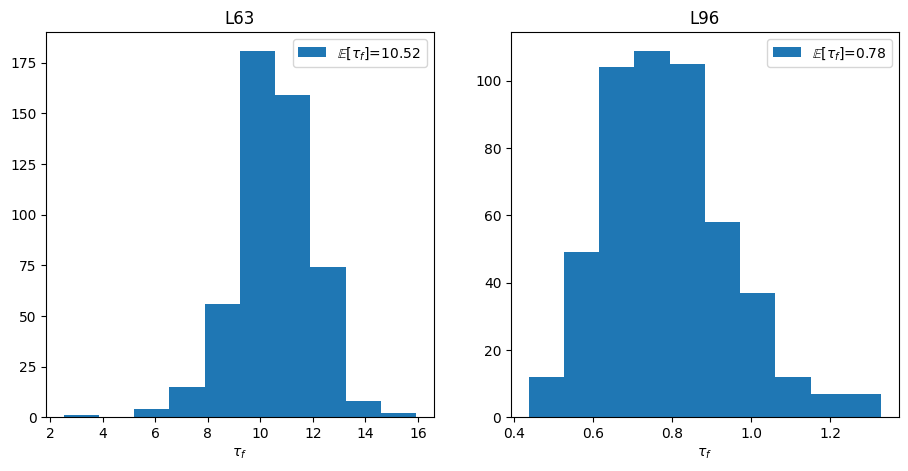

In [19]:
import pandas as pd
file = '../data/L63/EulerN/D_r-16384/batch_data.csv'
data = pd.read_csv(file)

fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax.hist(data['tau_f_se'], label = r'$\mathbb{E}[\tau_f]$='+f"{data['tau_f_se'].mean():.2f}")
ax.set_xlabel(r'$\tau_f$')
ax.set_title(r'L63')
ax.legend()


file1 = '../data/L96/EulerN/D_r-16384/batch_data.csv'
data1 = pd.read_csv(file1)
ax1.hist(data1['tau_f_se'], label = r'$\mathbb{E}[\tau_f]$='+f"{data1['tau_f_se'].mean():.2f}")
ax1.set_xlabel(r'$\tau_f$')
ax1.set_title(r'L96')
ax1.legend()
plt.savefig('../data/plots/tau_f-16384.png')

In [28]:
a = torch.randn(size=(20, 5))
b = a + 0
def f(x):
    x += 1.
f(a)
a == b

tensor([[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]])

In [29]:
a[0,1:3] = [8, 9]

TypeError: can't assign a list to a torch.DoubleTensor

In [26]:
a

array([[ 0.98794607,  8.        ,  9.        ,  0.11572626,  0.77218686],
       [ 0.17256785,  1.22588613,  0.12747836,  2.46189721,  0.36182911],
       [ 1.1524219 ,  1.57515685,  0.52774817,  1.2733115 ,  1.76526554],
       [-0.24486282,  1.16773958,  1.21212147,  1.20313199,  1.24501012],
       [ 2.51774321,  0.53586751,  1.55561144,  0.08234087,  0.70755003],
       [ 0.59359811,  0.34944256,  1.42049902,  0.58235182,  0.8043532 ],
       [ 1.20907964,  0.06882193, -0.26053219,  0.41639267,  2.5121233 ],
       [-0.05035213,  0.93715819,  0.30393149,  0.34990834,  1.36125289],
       [ 2.27301207,  1.8176159 ,  1.38530834, -0.40409665, -0.20118029],
       [ 0.70540941,  1.0464282 ,  1.0096473 ,  1.75872896,  0.66313858],
       [ 0.2369862 ,  0.88123475, -1.87773238, -0.36585457, -0.65727672],
       [-0.04486348,  1.70592508,  1.17231664,  1.09916726,  1.27663782],
       [ 0.77598037,  1.26842301,  0.21787319,  0.74235633,  0.13429256],
       [ 2.15904812,  2.86811568,  1.0